In [1]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv(r'house.csv')
df.drop('Unnamed: 0',axis=1, inplace=True)

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2


# Linear Regression

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('price',axis=1)
y= df['price']

In [28]:
X.shape

(21613, 19)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

In [30]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [31]:
model = LinearRegression()

In [32]:
model.fit(scaled_X_train,y_train)

LinearRegression()

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
prediction = model.predict(scaled_X_test)

In [35]:
df['price'].mean()

540088.1417665294

In [36]:
mean_absolute_error(y_test,prediction)

123637.54559433275

In [37]:
np.sqrt(mean_squared_error(y_test,prediction))

219047.01521330996

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

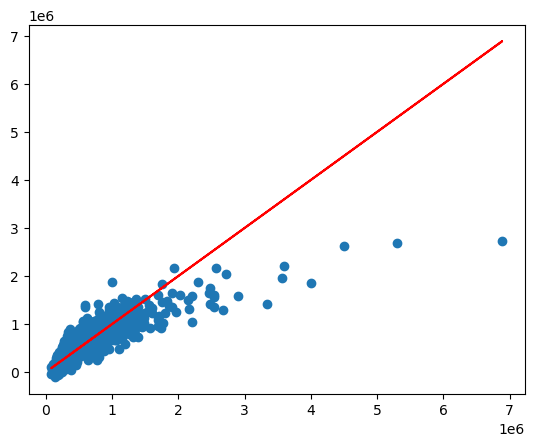

In [39]:
plt.scatter(y_test,prediction)

plt.plot(y_test,y_test,'r')

<AxesSubplot:xlabel='price', ylabel='Count'>

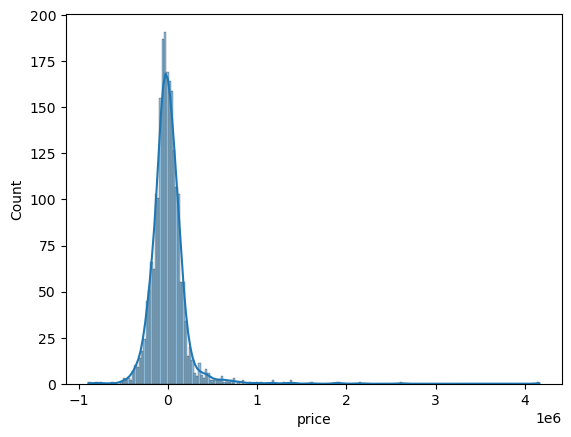

In [28]:
errors = y_test - prediction

sns.histplot(errors, kde=True)

# Principal Component Analysis

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [108]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [109]:
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [110]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[2.69413414e+01 1.08868515e+01 1.04890886e+01 9.48253915e+00
 6.85240708e+00 5.74112519e+00 5.13356384e+00 4.44246888e+00
 4.08754505e+00 3.45207722e+00 3.11418316e+00 2.62353750e+00
 1.71858696e+00 1.50172435e+00 1.33951413e+00 1.18970373e+00
 1.00374232e+00 4.88035933e-31 1.93798839e-31]



In [111]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 26.94134135  37.82819282  48.31728146  57.79982061  64.65222769
  70.39335288  75.52691671  79.96938559  84.05693064  87.50900787
  90.62319103  93.24672852  94.96531548  96.46703983  97.80655396
  98.99625768 100.         100.         100.        ]



Text(0, 0.5, 'Explained variance (%)')

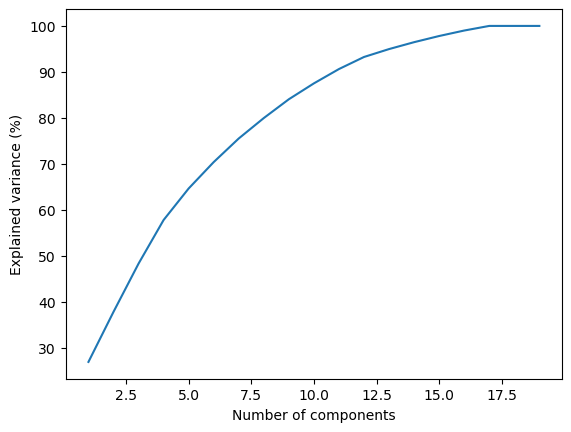

In [112]:
# scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[26.94134135 37.82819282 48.31728146 57.79982061 64.65222769 70.39335288
 75.52691671 79.96938559 84.05693064]
Number of components: 9


Text(0, 0.5, 'Explained variance (%)')

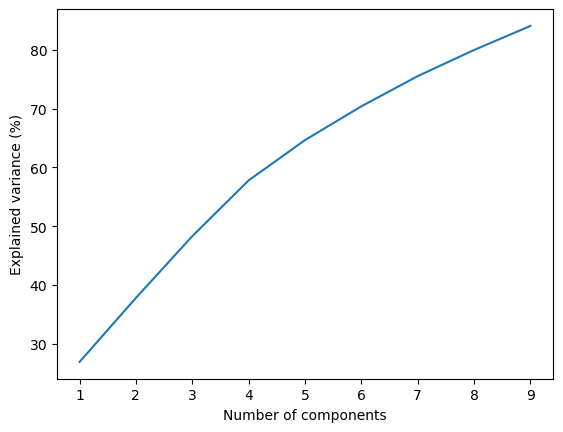

In [113]:
pca = PCA(n_components = 0.8)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [114]:
pca_components = abs(pca.components_)

print('Top 5 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 5)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:5]
    
    # print the top 5 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 5 most important features in each component
Component 0: ['bathrooms', 'grade', 'condition', 'bedrooms', 'long']
Component 1: ['sqft_above', 'sqft_basement', 'waterfront', 'view', 'lat']
Component 2: ['sqft_lot15', 'month', 'sqft_above', 'waterfront', 'sqft_basement']
Component 3: ['sqft_living15', 'sqft_living', 'lat', 'sqft_lot', 'yr_renovated']
Component 4: ['floors', 'waterfront', 'price', 'view', 'yr_built']
Component 5: ['yr_renovated', 'yr_built', 'floors', 'view', 'waterfront']
Component 6: ['yr_built', 'yr_renovated', 'price', 'condition', 'waterfront']
Component 7: ['view', 'sqft_above', 'sqft_basement', 'grade', 'sqft_lot']
Component 8: ['lat', 'sqft_lot', 'long', 'yr_renovated', 'sqft_living']


In [115]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(21613, 9)
[[-2.37881958  0.04318919 -1.62478878 ...  0.13108652  0.37509076
  -0.22901536]
 [-0.01985054  1.92181339 -2.04977855 ...  2.7742853  -0.31355869
  -0.25676251]
 [-2.76772501 -0.84714824  1.88753242 ... -1.14203825 -0.04850016
  -1.46995767]
 ...
 [-2.26170772 -1.76610716 -0.43600787 ... -0.71826415  0.52568595
   0.49936295]
 [ 0.13159606 -2.63073333  1.6965268  ...  0.04443267  0.21318438
  -0.13185594]
 [-2.26169682 -1.12017758 -2.13082814 ... -0.70380063  0.56235145
   0.47873694]]


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1,random_state=101)

In [117]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [118]:
model.fit(scaled_X_train,y_train)

LinearRegression()

In [119]:
pca_pred = model.predict(scaled_X_test)

In [120]:
mean_absolute_error(y_test,pca_pred)

129564.24312322977

In [121]:
np.sqrt(mean_squared_error(y_test,pca_pred))

230931.04810804967

I couldn't improve the model after implementing PCA. The different thresholds used are the following: 0.75, 0.8, 0.85, 0.9

# RFE

In [40]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

 Clf result : -147649.067, +- 3904.493 N_features : 5
 Clf result : -145370.033, +- 3823.826 N_features : 6
 Clf result : -143783.019, +- 4098.258 N_features : 7
 Clf result : -143652.661, +- 4134.435 N_features : 8
 Clf result : -131320.561, +- 4265.155 N_features : 9
 Clf result : -131323.815, +- 4201.812 N_features : 10
 Clf result : -131278.258, +- 4197.549 N_features : 11
 Clf result : -131259.427, +- 4207.246 N_features : 12
 Clf result : -126089.066, +- 4098.504 N_features : 13
 Clf result : -126092.103, +- 4095.187 N_features : 14
 Clf result : -126015.101, +- 4081.273 N_features : 15
 Clf result : -125876.377, +- 4000.180 N_features : 16
 Clf result : -125755.049, +- 4013.959 N_features : 17
 Clf result : -125790.423, +- 3985.245 N_features : 18


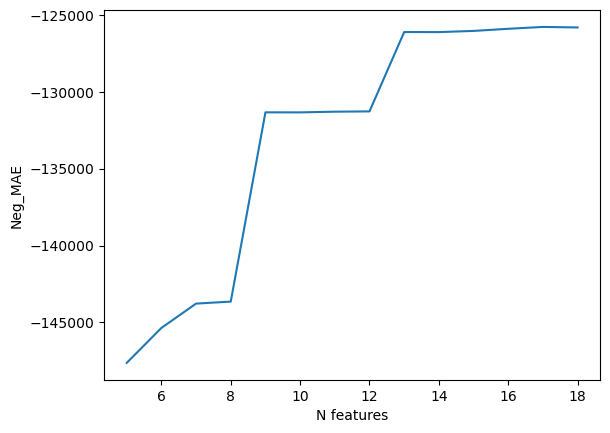

In [41]:
acc_results = []
n_features = []

for i in range(5, 19):
    rfe = RFE(estimator = model, n_features_to_select = i, step=1)
    rfe.fit(X,y)
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y,test_size = 0.1)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(model, X_train, y_train ,scoring= 'neg_mean_absolute_error', cv=10)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Neg_MAE')
plt.xlabel('N features')
plt.show()

In [52]:
#selection of features that provide the best accuracy 
rfe = RFE(estimator = model, n_features_to_select = 17, step=1)
rfe.fit(X, y)

#assigning of feature to a list
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [53]:
featured_columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'month',
 'year']

In [54]:
X = df[featured_columns]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


In [56]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [57]:
model.fit(scaled_X_train,y_train)
rfe_pred = model.predict(scaled_X_test)

In [58]:
mean_absolute_error(y_test,rfe_pred)

123795.75954062307

In [60]:
np.sqrt(mean_squared_error(y_test,rfe_pred))

219263.00184231697

Feature reduction seems to not improve the model. We are going to proceed to other models using all features

# Random Forest


In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

In [63]:
model = RandomForestRegressor()

In [64]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
predictions = model.predict(X_test)

In [66]:
mean_absolute_error(y_test,predictions)

68856.50305344479

In [67]:
np.sqrt(mean_squared_error(y_test,predictions))

131147.03009258845

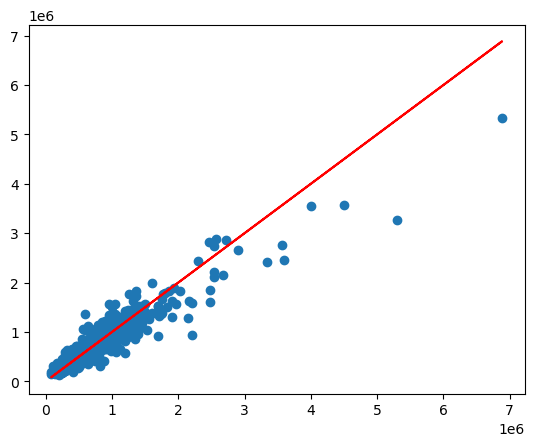

In [68]:
plt.scatter(y_test,predictions)

plt.plot(y_test,y_test,'r')

Random Forest gave us better results compared to Linear Regression.

# SVC

In [7]:
from sklearn.svm import SVR

In [8]:
scaler = MinMaxScaler()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

In [15]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [16]:
model = SVR()

In [17]:
model.fit(scaled_X_train, y_train)
predictions = model.predict(scaled_X_test)

In [18]:
mean_absolute_error(y_test, predictions)

224027.59763810487

In [20]:
np.sqrt(mean_squared_error(y_test, predictions))

676378.4698082572

The worst model so far.

# XGBoost

In [5]:
from xgboost import XGBRegressor

C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [12]:
model = XGBRegressor()

In [13]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [14]:
mean_absolute_error(y_test, predictions)

65726.21438482887

In [15]:
np.sqrt(mean_squared_error(y_test, predictions))

120625.50394186983

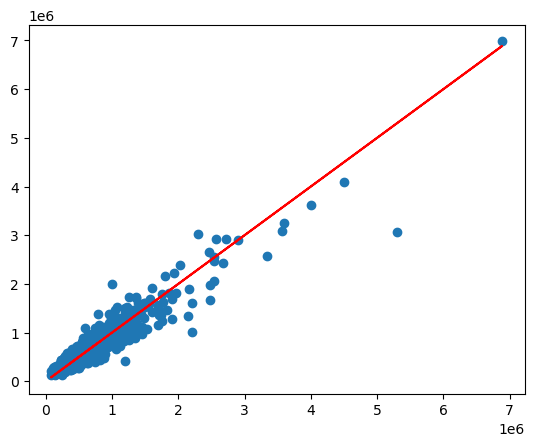

In [16]:
plt.scatter(y_test,predictions)

plt.plot(y_test,y_test,'r')

In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [24]:
clf = RandomizedSearchCV(estimator=model,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=100,
                         verbose=2)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   1.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   1.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   1.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   1.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   1.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.5; total time=  59.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.5; total time=  56.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.5; total time=  58.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.5; total time= 1.7min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.5; total time= 1.2min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=15, n_estimators=1000, subsample=0.8999999999999999; total time=  58.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=15, n_estimators=1000, subsample=0.8999999999999999; total time=  47.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=15, n_estimators=1000, subsample=0.8999999999999999; total time=  54.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=15, n_estimators=1000, subsample=0.8999999999999999; total time=  42.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=15, n_estimators=1000, subsample=0.8999999999999999; total time=  36.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8999999999999999; total time=   1.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8999999999999999; total time=   0.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8999999999999999; total time=   0.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8999999999999999; total time=   0.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8999999999999999; total time=   0.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   2.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   2.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   2.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   2.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   2.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.7; total time= 1.4min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.7; total time=  58.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.7; total time=  57.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.7; total time=  53.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.7; total time=  56.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=1000, subsample=0.6; total time=   8.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=1000, subsample=0.6; total time=   7.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=1000, subsample=0.6; total time=   7.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=1000, subsample=0.6; total time=   7.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=1000, subsample=0.6; total time=   7.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  26.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  26.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  26.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  26.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  22.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7999999999999999; total time=   3.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7999999999999999; total time=   3.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7999999999999999; total time=   3.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7999999999999999; total time=   3.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7999999999999999; total time=   3.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=20, n_estimators=100, subsample=0.7; total time=   8.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=20, n_estimators=100, subsample=0.7; total time=   7.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=20, n_estimators=100, subsample=0.7; total time=   9.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=20, n_estimators=100, subsample=0.7; total time=  10.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=20, n_estimators=100, subsample=0.7; total time=   8.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5; total time=   3.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5; total time=   3.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5; total time=   3.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5; total time=   4.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5; total time=   3.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.7; total time=  18.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.7; total time=  18.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.7; total time=  18.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.7; total time=  16.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.7; total time=  18.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=1000, subsample=0.6; total time=  12.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=1000, subsample=0.6; total time=  11.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=1000, subsample=0.6; total time=  11.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=1000, subsample=0.6; total time=  10.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=1000, subsample=0.6; total time=  10.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.5; total time=   6.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.5; total time=   6.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.5; total time=   6.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.5; total time=   6.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.5; total time=   7.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=6, n_estimators=500, subsample=0.5; total time=   6.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=6, n_estimators=500, subsample=0.5; total time=   6.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=6, n_estimators=500, subsample=0.5; total time=   6.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=6, n_estimators=500, subsample=0.5; total time=   6.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=6, n_estimators=500, subsample=0.5; total time=   6.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   8.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   8.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   8.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   8.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   8.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.8999999999999999; total time=  10.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.8999999999999999; total time=   9.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.8999999999999999; total time=   9.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.8999999999999999; total time=   9.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.8999999999999999; total time=   9.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   2.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   2.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   2.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   2.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   2.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  31.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  32.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  28.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  29.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  28.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.8999999999999999; total time=   2.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.8999999999999999; total time=   2.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.8999999999999999; total time=   2.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.8999999999999999; total time=   2.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.8999999999999999; total time=   2.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   2.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   2.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   2.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   2.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7999999999999999; total time=   2.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=15, n_estimators=1000, subsample=0.6; total time=  42.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=15, n_estimators=1000, subsample=0.6; total time=  42.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=15, n_estimators=1000, subsample=0.6; total time=  44.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=15, n_estimators=1000, subsample=0.6; total time=  49.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=15, n_estimators=1000, subsample=0.6; total time=  48.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7999999999999999; total time=   1.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7999999999999999; total time=   1.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7999999999999999; total time=   1.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7999999999999999; total time=   1.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7999999999999999; total time=   1.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.6, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  23.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.6, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  24.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.6, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  22.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.6, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  27.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.6, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  24.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.7999999999999999; total time=  49.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.7999999999999999; total time= 1.1min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.7999999999999999; total time= 1.6min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.7999999999999999; total time= 1.4min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.7999999999999999; total time= 1.4min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  25.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  25.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  26.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  27.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  27.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   1.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  21.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  22.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  23.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  23.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  27.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.6; total time=   5.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.6; total time=   5.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.6; total time=   5.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.6; total time=   6.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.6; total time=   6.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=20, n_estimators=500, subsample=0.5; total time=  57.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=20, n_estimators=500, subsample=0.5; total time=  48.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=20, n_estimators=500, subsample=0.5; total time=  54.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=20, n_estimators=500, subsample=0.5; total time=  39.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=20, n_estimators=500, subsample=0.5; total time=  33.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.7; total time=   3.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.7; total time=   3.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.7; total time=   3.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.7; total time=   3.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.7; total time=   3.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7999999999999999; total time=   6.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7999999999999999; total time=   6.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7999999999999999; total time=   6.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7999999999999999; total time=   6.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7999999999999999; total time=   5.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8999999999999999; total time=   1.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8999999999999999; total time=   1.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8999999999999999; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8999999999999999; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8999999999999999; total time=   1.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.5; total time=  56.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.5; total time= 1.0min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.5; total time= 1.1min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.5; total time= 1.2min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.5; total time= 1.1min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=100, subsample=0.5; total time=   4.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=100, subsample=0.5; total time=   4.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=100, subsample=0.5; total time=   4.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=100, subsample=0.5; total time=   4.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=100, subsample=0.5; total time=   4.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  22.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  21.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  22.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  23.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  21.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=1000, subsample=0.6; total time=  12.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=1000, subsample=0.6; total time=  13.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=1000, subsample=0.6; total time=  14.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=1000, subsample=0.6; total time=  17.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=1000, subsample=0.6; total time=  18.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   1.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   1.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   1.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   1.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   2.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   2.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   2.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6; total time=   1.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6; total time=   2.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6; total time=   2.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6; total time=   2.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6; total time=   2.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7999999999999999; total time=   6.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7999999999999999; total time=   5.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7999999999999999; total time=   5.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7999999999999999; total time=   6.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7999999999999999; total time=   6.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=  14.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   9.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   9.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=  10.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   9.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.2, max_depth=15, n_estimators=100, subsample=0.6; total time=   3.6s
[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.2, max_depth=15, n_estimators=100, subsample=0.6; total time=   5.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.2, max_depth=15, n_estimators=100, subsample=0.6; total time=   4.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.2, max_depth=15, n_estimators=100, subsample=0.6; total time=   6.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.2, max_depth=15, n_estimators=100, subsample=0.6; total time=   5.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=  10.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   9.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   8.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   9.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=1000, subsample=0.7999999999999999; total time=   8.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.7; total time=  32.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.7; total time=  30.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.7; total time=  30.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.7; total time=  30.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.7; total time=  30.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7; total time=   3.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7; total time=   2.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7; total time=   2.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7; total time=   2.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7; total time=   2.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=1000, subsample=0.7; total time=  11.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=1000, subsample=0.7; total time=  11.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=1000, subsample=0.7; total time=  11.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=1000, subsample=0.7; total time=  11.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=1000, subsample=0.7; total time=  11.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8999999999999999; total time=   3.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8999999999999999; total time=   3.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8999999999999999; total time=   4.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8999999999999999; total time=   4.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8999999999999999; total time=   3.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5; total time=   5.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5; total time=   5.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5; total time=   5.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5; total time=   5.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5; total time=   5.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.5; total time=   7.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.5; total time=   7.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.5; total time=   7.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.5; total time=   7.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.5; total time=   7.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.2, max_depth=6, n_estimators=1000, subsample=0.5; total time=  10.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.2, max_depth=6, n_estimators=1000, subsample=0.5; total time=  11.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.2, max_depth=6, n_estimators=1000, subsample=0.5; total time=  12.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.2, max_depth=6, n_estimators=1000, subsample=0.5; total time=  11.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.2, max_depth=6, n_estimators=1000, subsample=0.5; total time=  11.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  23.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  24.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  25.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  26.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=500, subsample=0.7; total time=  24.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.5; total time=   9.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.5; total time=   8.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.5; total time=   8.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.5; total time=   9.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.5; total time=   8.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.5; total time=   3.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.5; total time=   3.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.5; total time=   3.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.5; total time=   3.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.5; total time=   3.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.6; total time=   5.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.6; total time=   5.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.6; total time=   5.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.6; total time=   5.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.6; total time=   5.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.2, max_depth=15, n_estimators=1000, subsample=0.5; total time=  37.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.2, max_depth=15, n_estimators=1000, subsample=0.5; total time=  37.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.2, max_depth=15, n_estimators=1000, subsample=0.5; total time=  37.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.2, max_depth=15, n_estimators=1000, subsample=0.5; total time=  39.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.2, max_depth=15, n_estimators=1000, subsample=0.5; total time=  37.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  22.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  22.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  22.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  22.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=1000, subsample=0.8999999999999999; total time=  21.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8999999999999999; total time=   0.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.8999999999999999; total time= 2.0min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.8999999999999999; total time= 2.0min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.8999999999999999; total time= 1.9min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.8999999999999999; total time= 2.0min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.8999999999999999; total time= 2.0min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=500, subsample=0.6; total time=  36.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=500, subsample=0.6; total time=  35.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=500, subsample=0.6; total time=  38.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=500, subsample=0.6; total time=  43.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.3, max_depth=20, n_estimators=500, subsample=0.6; total time=  38.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=1000, subsample=0.5; total time=  12.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=1000, subsample=0.5; total time=  11.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=1000, subsample=0.5; total time=  11.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=1000, subsample=0.5; total time=  13.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=1000, subsample=0.5; total time=  12.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=6, n_estimators=1000, subsample=0.7; total time=  13.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=6, n_estimators=1000, subsample=0.7; total time=  13.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=6, n_estimators=1000, subsample=0.7; total time=  12.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=6, n_estimators=1000, subsample=0.7; total time=  12.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=6, n_estimators=1000, subsample=0.7; total time=  12.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.6; total time=   5.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.6; total time=   5.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.6; total time=   5.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.6; total time=   5.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.6; total time=   4.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.6, learning_rate=0.01, max_depth=20, n_estimators=100, subsample=0.6; total time=   3.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.6, learning_rate=0.01, max_depth=20, n_estimators=100, subsample=0.6; total time=   3.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.6, learning_rate=0.01, max_depth=20, n_estimators=100, subsample=0.6; total time=   3.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.6, learning_rate=0.01, max_depth=20, n_estimators=100, subsample=0.6; total time=   3.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.6, learning_rate=0.01, max_depth=20, n_estimators=100, subsample=0.6; total time=   3.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.6; total time=  23.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.6; total time=  22.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.6; total time=  22.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.6; total time=  24.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.6; total time=  23.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.01, max_depth=20, n_estimators=500, subsample=0.7999999999999999; total time=  46.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.01, max_depth=20, n_estimators=500, subsample=0.7999999999999999; total time=  47.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.01, max_depth=20, n_estimators=500, subsample=0.7999999999999999; total time=  45.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.01, max_depth=20, n_estimators=500, subsample=0.7999999999999999; total time=  48.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.7, learning_rate=0.01, max_depth=20, n_estimators=500, subsample=0.7999999999999999; total time=  45.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   3.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   4.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   3.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   3.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   3.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.7999999999999999; total time=   5.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.7999999999999999; total time=   6.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.7999999999999999; total time=   6.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.7999999999999999; total time=   6.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.3, max_depth=15, n_estimators=100, subsample=0.7999999999999999; total time=   5.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, learning_rate=0.01, max_depth=20, n_estimators=500, subsample=0.8999999999999999; total time=  40.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, learning_rate=0.01, max_depth=20, n_estimators=500, subsample=0.8999999999999999; total time=  39.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, learning_rate=0.01, max_depth=20, n_estimators=500, subsample=0.8999999999999999; total time=  41.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, learning_rate=0.01, max_depth=20, n_estimators=500, subsample=0.8999999999999999; total time=  39.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, learning_rate=0.01, max_depth=20, n_estimators=500, subsample=0.8999999999999999; total time=  38.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.5; total time=   5.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.5; total time=   5.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.5; total time=   5.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.5; total time=   5.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.2, max_depth=6, n_estimators=500, subsample=0.5; total time=   5.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7999999999999999; total time=   6.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7999999999999999; total time=   6.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7999999999999999; total time=   6.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7999999999999999; total time=   6.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7999999999999999; total time=   6.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.7; total time=   1.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.7; total time=   1.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.7; total time=   1.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.7; total time=   1.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.7; total time=   1.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8999999999999999; total time=   5.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8999999999999999; total time=   6.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8999999999999999; total time=   5.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8999999999999999; total time=   5.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8999999999999999; total time=   5.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.5; total time=   9.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.5; total time=   9.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.5; total time=   9.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.5; total time=   9.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.5; total time=   9.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  29.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  31.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  29.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  29.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.7999999999999999; total time=  30.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.6; total time=  25.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.6; total time=  26.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.6; total time=  25.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.6; total time=  25.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.6; total time=  25.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8999999999999999; total time=   3.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8999999999999999; total time=   3.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8999999999999999; total time=   3.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8999999999999999; total time=   3.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.8999999999999999, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8999999999999999; total time=   3.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7; total time=   4.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7; total time=   4.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7; total time=   4.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7; total time=   4.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7; total time=   4.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.7; total time= 1.4min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.7; total time= 1.4min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.7; total time= 1.3min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.7; total time= 1.4min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.4, learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.7; total time= 1.3min


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.6; total time=   9.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.6; total time=   8.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.6; total time=   8.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.6; total time=   8.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.6; total time=   9.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.6, learning_rate=0.01, max_depth=15, n_estimators=500, subsample=0.6; total time=  18.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.6, learning_rate=0.01, max_depth=15, n_estimators=500, subsample=0.6; total time=  17.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.6, learning_rate=0.01, max_depth=15, n_estimators=500, subsample=0.6; total time=  18.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.6, learning_rate=0.01, max_depth=15, n_estimators=500, subsample=0.6; total time=  18.5s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.6, learning_rate=0.01, max_depth=15, n_estimators=500, subsample=0.6; total time=  17.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7999999999999999; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7999999999999999; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7999999999999999; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7999999999999999; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7999999999999999; total time=   0.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=15, n_estimators=500, subsample=0.8999999999999999; total time=  20.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=15, n_estimators=500, subsample=0.8999999999999999; total time=  20.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=15, n_estimators=500, subsample=0.8999999999999999; total time=  20.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=15, n_estimators=500, subsample=0.8999999999999999; total time=  21.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.4, learning_rate=0.01, max_depth=15, n_estimators=500, subsample=0.8999999999999999; total time=  20.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5; total time=   6.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5; total time=   5.9s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5; total time=   6.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5; total time=   5.8s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.4, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5; total time=   5.7s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=500, subsample=0.6; total time=  14.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=500, subsample=0.6; total time=  14.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=500, subsample=0.6; total time=  14.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=500, subsample=0.6; total time=  14.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=500, subsample=0.6; total time=  14.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.8999999999999999; total time=   5.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.8999999999999999; total time=   5.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.8999999999999999; total time=   5.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.8999999999999999; total time=   5.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.5, colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.8999999999999999; total time=   5.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7; total time=   6.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7; total time=   5.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7; total time=   5.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7; total time=   5.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7; total time=   5.2s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=15, n_estimators=500, subsample=0.6; total time=  28.4s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=15, n_estimators=500, subsample=0.6; total time=  26.6s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=15, n_estimators=500, subsample=0.6; total time=  27.3s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=15, n_estimators=500, subsample=0.6; total time=  32.0s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=15, n_estimators=500, subsample=0.6; total time=  28.1s


C:\Users\George\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RandomizedSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=10...
                                          validate_parameters=1,
                                          verbosity=None),
                   n_iter=100,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=2)

In [25]:
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.5}
Lowest RMSE:  116014.56975009751


In [26]:
clf_pred = clf.predict(X_test)

In [27]:
mean_absolute_error(y_test, clf_pred)

63075.61868712419

In [28]:
np.sqrt(mean_squared_error(y_test, clf_pred))

118183.6311297161

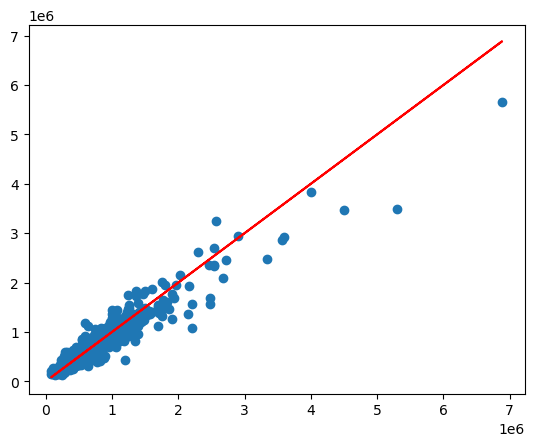

In [29]:
plt.scatter(y_test, clf_pred)

plt.plot(y_test,y_test,'r')